### Wstęp do Uczenia Maszynowego 
##### Laboratorium 13

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#### Zbiór trzech skupień

In [30]:
## definicja zbioru z pakietu sklearn
df = make_blobs(45, 2, centers=3, random_state=1234)

## podział na X i zmiana nazw kolumn
X = pd.DataFrame(df[0])
X.columns = ["X1", "X2"]
## podział na labels i zmiana nazw kolumn
labels = pd.DataFrame(df[1])
labels.columns = ["label"]

all = pd.concat([X, labels], axis=1)

### Zadanie 0
-----
Przygotuj wizualizację powyższego zbioru danych. Do każdej obserwacji na wykresie przypisz jej numer.

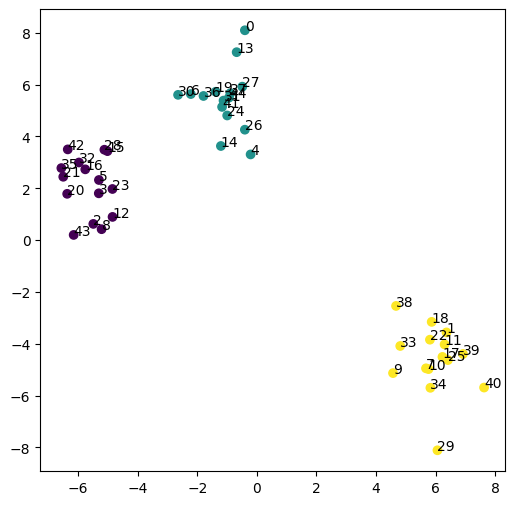

In [31]:
## wykres zbioru danych
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(X.X1, X.X2, c = labels.label)

## podpisanie punktów
n = np.arange(X.shape[0])

for i, txt in enumerate(n):
    ax.annotate(txt, (X.X1[i], X.X2[i]))


### Zadanie 1 (szybka powtórka)
-------------------------------------------------------------
Przygotuj model k-średnich dla k = 2, 3. Narysuj przypisanie punktów do skupień. Zaznacz centroidy.

In [32]:
kmeans2 = KMeans(n_clusters = 2) # KMeans dla k = 2
kmeans3 = KMeans(n_clusters = 3) # KMeans dla k = 3

In [ ]:
kmeans2.fit(X)
kmeans3.fit(X)

Text(0.5, 1.0, 'k-średnich, k = 3')

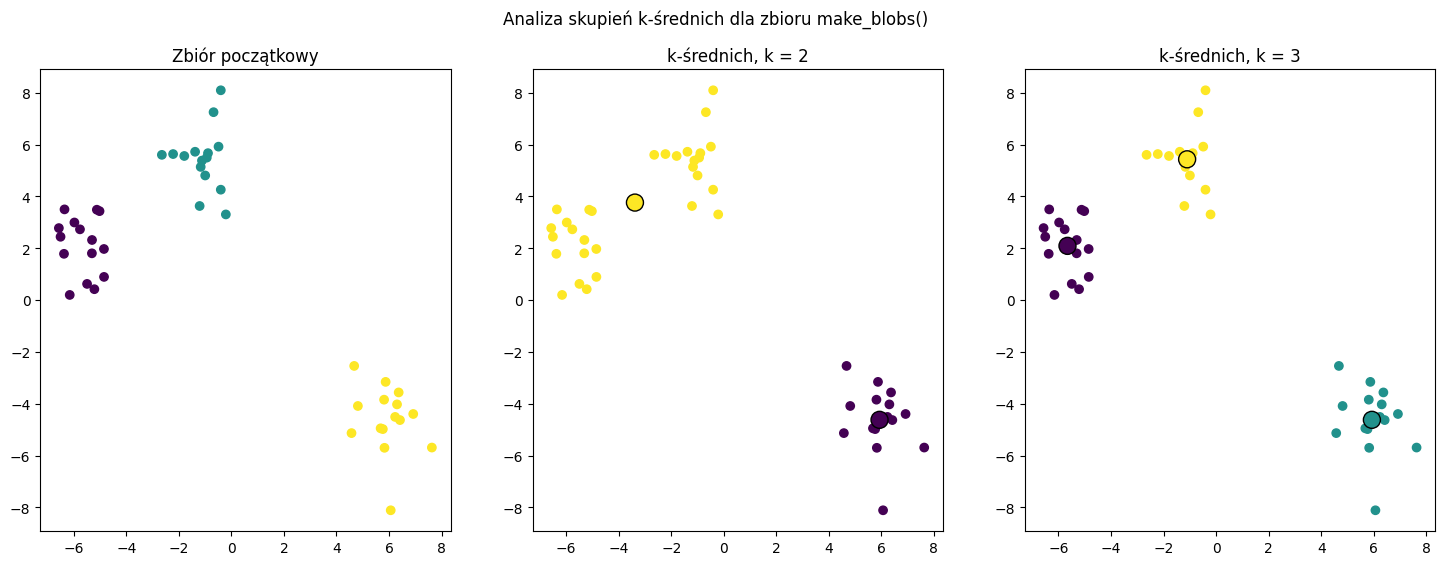

In [34]:
## wizualizacja wyników
fig, axs = plt.subplots(1,3) # panel 3 wykresów
fig.set_size_inches(18,6) # rozmiar wykresu
fig.suptitle('Analiza skupień k-średnich dla zbioru make_blobs()') # tytuł dla wszystkich trzech wykresów
axs[0].scatter(X.X1, X.X2, c = labels.label) # punktowy
axs[0].set_title("Zbiór początkowy") # tytuł
axs[1].scatter(X.X1, X.X2, c = kmeans2.labels_) # punktowy, kolorem etykiety z KMeans
axs[1].scatter(kmeans2.cluster_centers_[:,0], # punktowy, centroidy z KMeans
               kmeans2.cluster_centers_[:,1], 
               c = np.unique(kmeans2.labels_), 
               edgecolors = "black", 
               s = 150)
axs[1].set_title("k-średnich, k = 2")
axs[2].scatter(X.X1, X.X2, c = kmeans3.labels_)
axs[2].scatter(kmeans3.cluster_centers_[:,0], 
               kmeans3.cluster_centers_[:,1], 
               c = np.unique(kmeans3.labels_), 
               edgecolors = "black", 
               s = 150)
axs[2].set_title("k-średnich, k = 3")

### Metody hierarchiczne


###### https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

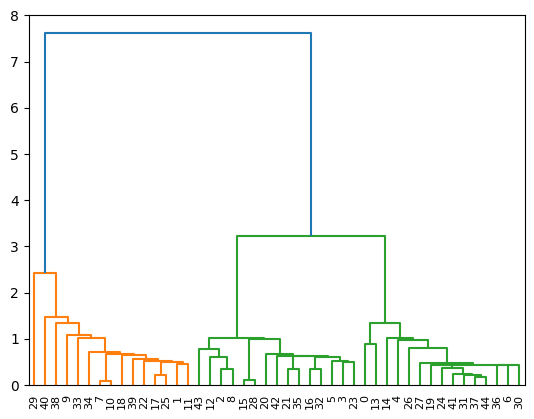

In [35]:
## dengrogram dla metody hierarchicznej
from scipy.cluster import hierarchy
Z = hierarchy.linkage(X, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)

In [36]:
# analiza skupień - metoda hierarchiczne 
AgCl_single = AgglomerativeClustering(linkage = "single", 
                                      n_clusters = 3).fit(X) # single = min
AgCl_complete = AgglomerativeClustering(linkage = "complete",
                                        n_clusters = 3).fit(X) # complete = max

Text(0.5, 1.0, 'k = 3, complete')

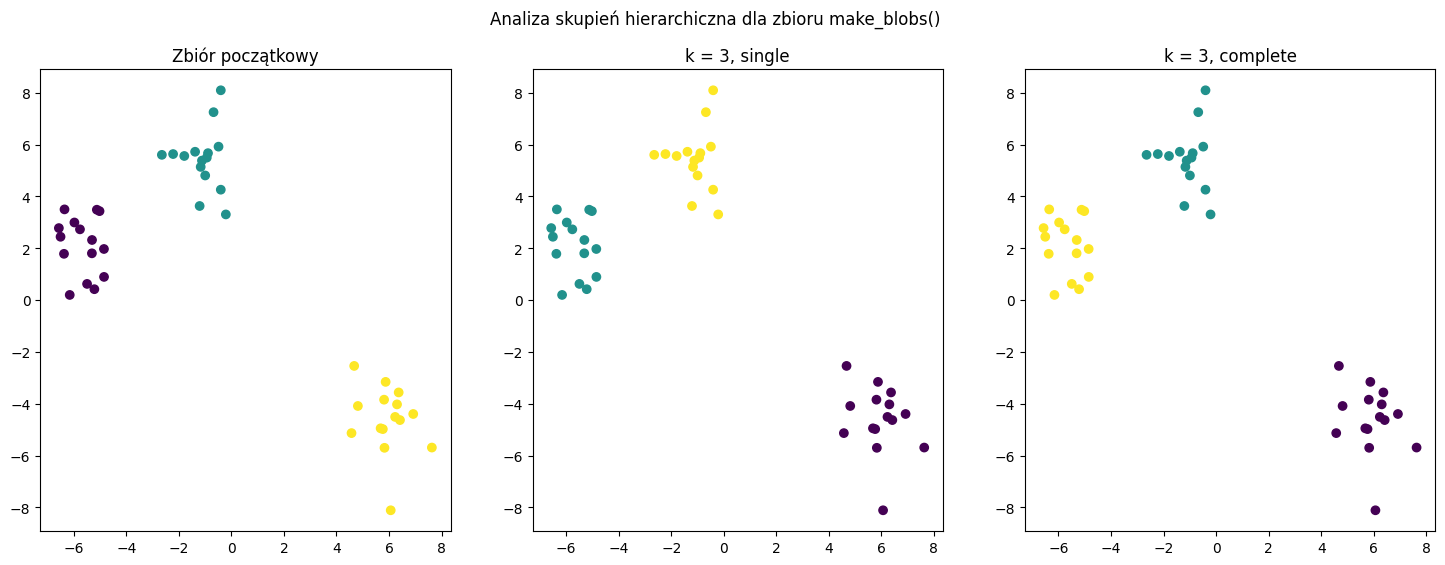

In [37]:
## wizualizacja wyników
fig, axs = plt.subplots(1,3)
fig.set_size_inches(18,6)
fig.suptitle('Analiza skupień hierarchiczna dla zbioru make_blobs()')

axs[0].scatter(X.X1, X.X2, c = labels.label)
axs[0].set_title("Zbiór początkowy")
axs[1].scatter(X.X1, X.X2, c = AgCl_single.labels_)
axs[1].set_title("k = 3, single")
axs[2].scatter(X.X1, X.X2, c = AgCl_complete.labels_)
axs[2].set_title("k = 3, complete")

### Zadanie 2
---
Zbiór danych s1.csv zawiera pewne sztucznie wygenerowane dwuwymiarowe dane.

a) Zwizualizuj dane.

b) Dopasuj metodę k-średnich. Zaproponuj liczbę klastrów.

c) Dopasuj metodę klasteryzacji hierarchicznej z funkcją łączącą *single* i *complete*.

d) Określ optymalną liczbę klastrów. Zwizualizuj dokonany podział na klastry. Która metoda daje lepsze rezultaty?

In [38]:
# import danych
df = pd.read_csv("s1.csv")

In [39]:
# nadanie nazw kolumn
df.columns = ["X1", "X2"]
df

,X1,X2
0,665845,557965
1,597173,575538
2,618600,551446
3,635690,608046
4,588100,557588
...,...,...
4994,665426,853940
4995,691827,863963
4996,650661,861267
4997,599647,858702


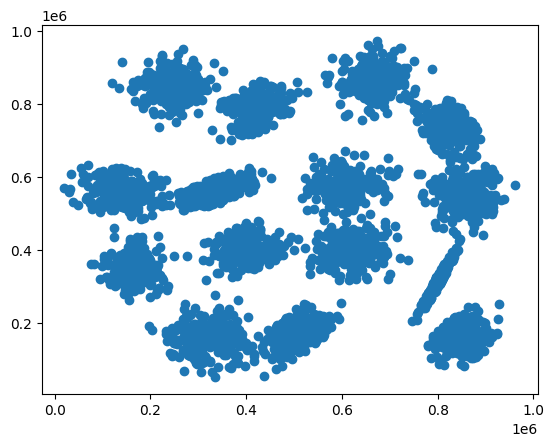

In [40]:
# a)
# wykres danych
plt.scatter(x = df.X1, y = df.X2)

In [41]:
# b)
# hiperparametry algorytmu KMeans()
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
   }

# lista do zapisywania wyników błędu SSE
sse = []

# lista po zakresie k
for k in range(8, 20):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

Text(0.5, 1.0, 'Wykres zależności SSE od liczby skupień')

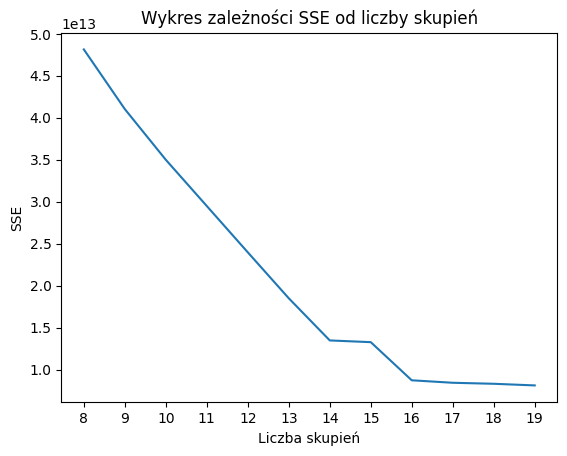

In [42]:
# wykres zależności błędu SSE od liczby skupień
plt.plot(range(8, 20),sse)
plt.xticks(range(8, 20))
plt.xlabel("Liczba skupień")
plt.ylabel("SSE")
plt.title("Wykres zależności SSE od liczby skupień")

In [43]:
# Warto rozważyć 14 lub 15 klastrów.

kmeans = KMeans(n_clusters = 15, n_init = 10).fit(df)

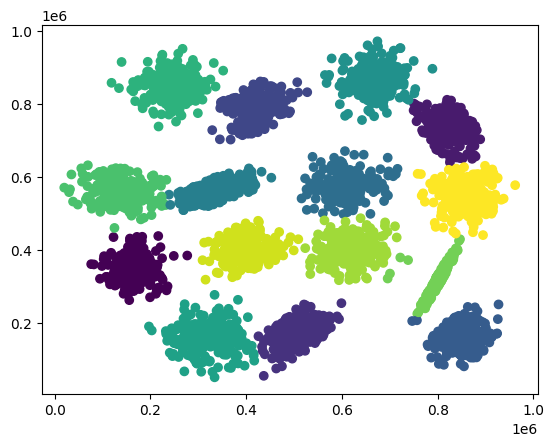

In [44]:
# wizualizacja etykiet z KMeans
plt.scatter(x = df.X1, y = df.X2, c = kmeans.labels_)

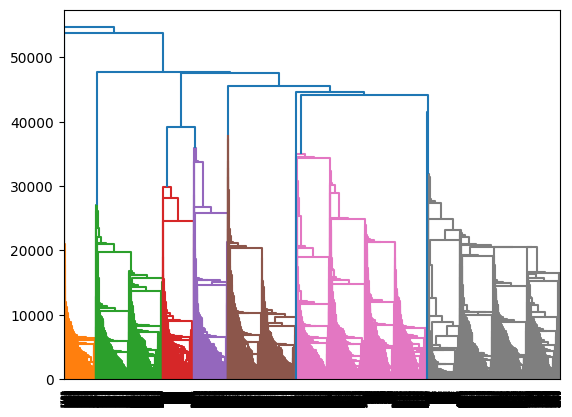

In [45]:
# c) i d)

# pełny dendogram - single
from scipy.cluster import hierarchy
Z = hierarchy.linkage(df, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)


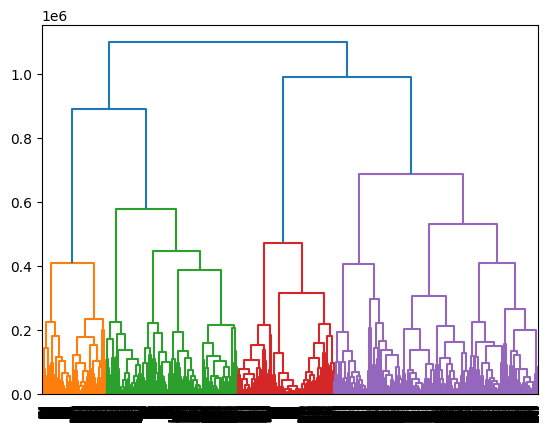

In [46]:
# pełny dendogram - comlete
from scipy.cluster import hierarchy
Z = hierarchy.linkage(df, 'complete')
plt.figure()
dn = hierarchy.dendrogram(Z)

In [47]:
# metody hierarchiczne
AgCl_single = AgglomerativeClustering(linkage = "single", n_clusters = 15).fit(df)
AgCl_complete = AgglomerativeClustering(linkage = "complete", n_clusters = 15).fit(df)


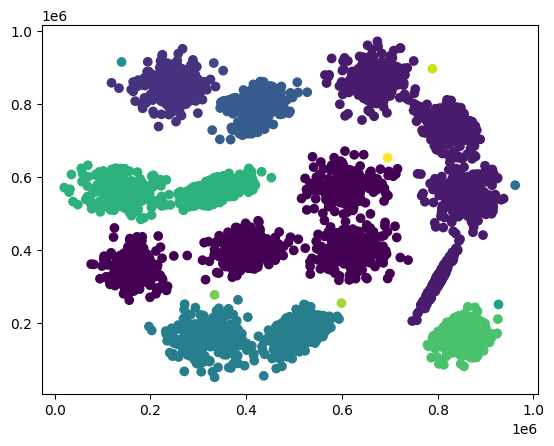

In [48]:
# wykres dla metody single
plt.scatter(x = df.X1, y = df.X2, c = AgCl_single.labels_)

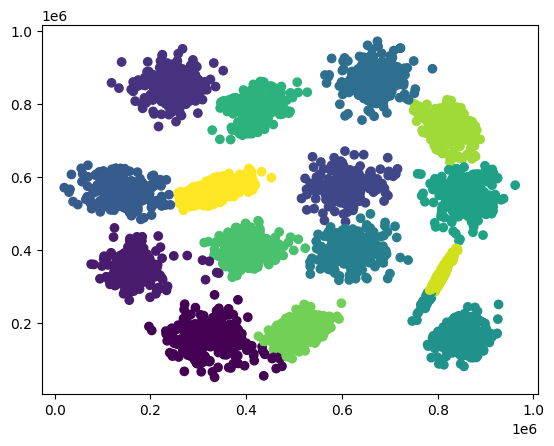

In [49]:
# wykres dla metody complete
plt.scatter(x = df.X1, y = df.X2, c = AgCl_complete.labels_)

Text(0.5, 1.0, 'Complete')

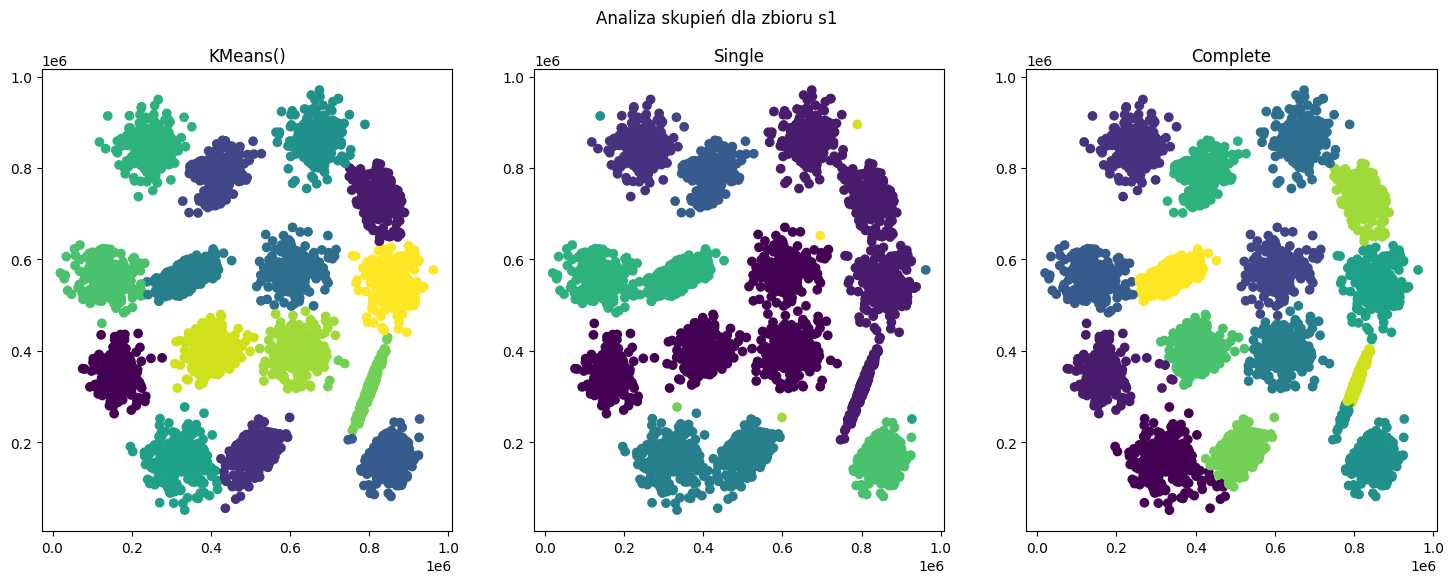

In [50]:
# porównanie trzech podejść
fig, axs = plt.subplots(1,3)
fig.set_size_inches(18,6)
fig.suptitle('Analiza skupień dla zbioru s1')

axs[0].scatter(x = df.X1, y = df.X2, c = kmeans.labels_)
axs[0].set_title("KMeans()")
axs[1].scatter(x = df.X1, y = df.X2, c = AgCl_single.labels_)
axs[1].set_title("Single")
axs[2].scatter(x = df.X1, y = df.X2, c = AgCl_complete.labels_)
axs[2].set_title("Complete")

## DBSCAN

In [51]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# zbiór danych o 3 skupieniach z większym rozrzutem
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples = 750,
    centers = centers,
    cluster_std = 0.4,
    random_state = 0
)

X = StandardScaler().fit_transform(X)

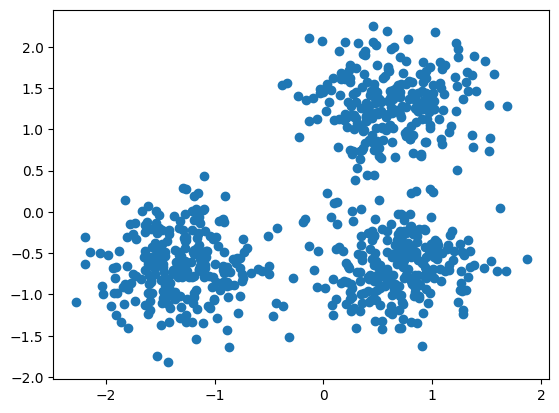

In [52]:
# wykres zbioru danych
plt.scatter(X[:, 0], X[:, 1])

In [53]:
from sklearn.cluster import DBSCAN

# algorytm DBSCAN, należy pamiętać o dobraniu hiperparametrów eps i min_samples
db = DBSCAN(eps = 0.3, min_samples = 10).fit(X)
labels = db.labels_

# metoda DBSCAN sama dobiera liczbę skupień oraz punkty uznawane za outliery
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


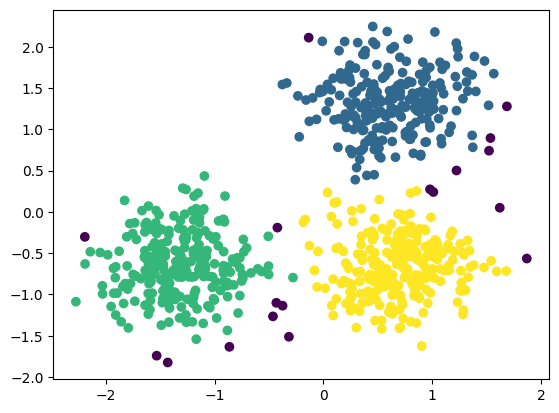

In [54]:
# wizualizacji etykiet
plt.scatter(X[:, 0], X[:, 1], c = db.labels_)

### Zadanie 3
---
Zbiór danych jain.csv zawiera dwuwymiarowe dane.

a) Zwizualizuj dane.

b) Użyj algorytmu k-średnich z liczbą klastrów równą 2. Zwizualizuj dokonany podział na klastry.
Czy metoda dobrze działa? Porównaj uzyskane wyniki z prawdziwymi wartościami klastrów.

c) Użyj algorytmu hierarchicznego analizy skupień z linkage single oraz complete.

d) Powtórz wcześniejszy podpunkt dla algorytmu DBSCAN. Która metoda daje najbardziej
zbliżony do rzeczywistego podział na klastry?


In [55]:
jain = pd.read_csv("jain.csv")
jain.columns = ["X1", "X2", "Y"] # zmiana nazw kolumn

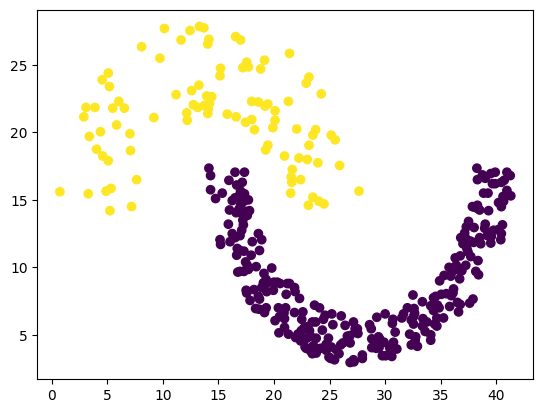

In [56]:
# a) wizualizacja zbioru danych
plt.scatter(x = jain.X1, y = jain.X2, c = jain.Y)

In [57]:
# b), c), d)
# k-średnich
kmeans = KMeans(n_clusters = 2).fit(jain)

# hierarchiczny 'single'
single = AgglomerativeClustering(linkage = "single", n_clusters = 2).fit(jain)

# hierarchiczny 'complete'
complete = AgglomerativeClustering(linkage = "complete", n_clusters = 2).fit(jain)

# dbscan
db = DBSCAN(eps = 2.5, min_samples = 15).fit(jain)

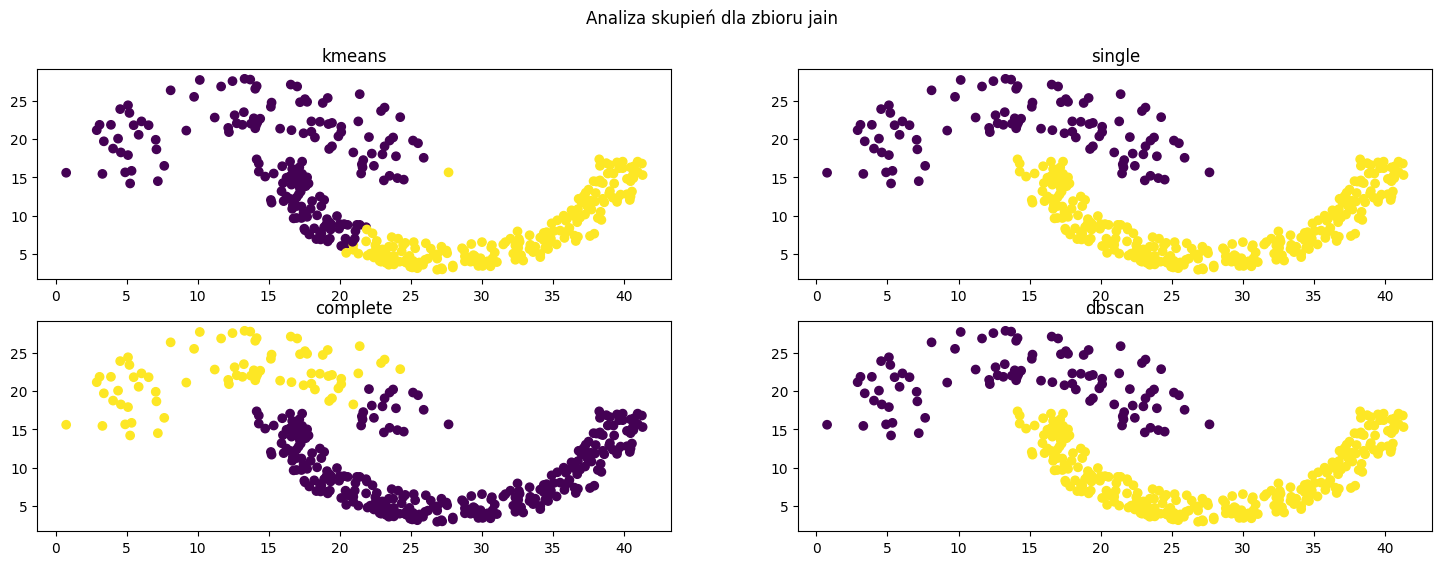

In [58]:
## wizualizacja wyników
fig, axs = plt.subplots(2,2)
fig.set_size_inches(18,6)
fig.suptitle('Analiza skupień dla zbioru jain')

labels = [kmeans.labels_, single.labels_, complete.labels_, db.labels_]
title = ["kmeans", "single",  "complete", "dbscan"]


for i, ax in enumerate(axs.flatten()):
    ax.scatter(x = jain.X1, y = jain.X2, c = labels[i])
    ax.set_title(title[i])
    


> W algorytmie DBSCAN górna część wykresu jest traktowana jako outliery - nie jako druga klasa!